## Redes neuronales

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)


### Tipos de funciones de activación:
Fuente: https://mlfromscratch.com/activation-functions-explained/#/
![title](https://mlfromscratch.com/content/images/2019/12/activation-functions.gif)

![](http://grupo.us.es/gtocoma/pid/pid10/RedesNeuronales_archivos/image041.jpg)


### Funciones de pérdida:

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/lossfn.png)
Fuente: medium.com



### Descenso del gradiente (intuición)

- La deducción no es propósito de esta notebook, pero cada nuevo paso en busca de la minimización de la función de costo, obedece la siguiente regla:

$ v -> v' = v - \eta \nabla C$, donde $v$ es $f(w, b)$ y $\eta$ la tasa de aprendizaje (tamaño de paso, learning rate)

- Se da un paso en dirección opuesta al gradiente hasta minimizar la función de costo.

- Se le llama *backpropagation* al algoritmo que realiza esto iterativamente desde la última capa hasta la primera.

Fuente: https://kevinbinz.com/2019/05/26/intro-gradient-descent/

![title](https://kevinbinz.files.wordpress.com/2019/05/dualspace_explore.gif)

- Se quiere encontrar (x,y) tal que sea un mínimo en la superficie (función de costo).

Fuente: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

![title](https://miro.medium.com/max/819/1*hUd744hDEEGx0-ypWGhrkw.gif)


![title](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/approxTheorem.png)



### Algunos tipos de redes neuronales
Fuente: https://www.asimovinstitute.org/neural-network-zoo/
<div>
    <img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png", width="500">
</div>

## 1. Construyamos una red neuronal con keras para regresión

In [1]:
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import OneHotEncoder

#### Analicemos si una red neuronal puede aprender las siguientes tres funciones:

* $line(x) = 2x+3$
* $quadratic(x) = x^2 +2$
* $quadtres(x_1,x_2,x_3) = x_1^2 + 2x_2 + x_3$

In [47]:
def line(x):
    return 2*x + 3 + 0.05

def quadratic(x):
    return x**2 + 2 + 0.001 

def quadtres(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i, 0]**2 + 2*x[i, 1] + x[i, 2]
    return y

In [73]:
# Descomentar función para generar datos
# fn = line
# fn = quadratic
fn = quadtres

# Seleccionar número de puntos para el dataset
npoints = 100
ruido = 0.2*np.random.randn(npoints)

# Generar X
## para line y quadratic
# X = np.random.randint(0, 10, npoints) 
###### para tercera opcion
X = np.random.rand(npoints, 3)

# Generar Y
Y = fn(X)+ ruido

# Ver tabla de datos
## para line y quadratic
# data =pd.DataFrame(zip(X,Y), columns=['x', 'y'])

###### para quadtres
data =pd.DataFrame(zip(X[:,0], X[:,1], X[:,2], Y), columns=['$x_1$', '$x_2$', '$x_3$', 'y'])


data.head(5)

,$x_1$,$x_2$,$x_3$,y
0,0.974469,0.347305,0.069599,1.848845
1,0.065850,0.572117,0.090166,1.030577
2,0.323386,0.852344,0.997252,2.980380
3,0.364136,0.030165,0.817561,0.704575
4,0.562748,0.145269,0.849970,1.524232


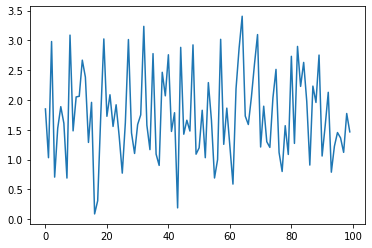

In [74]:
# plt.scatter(X, Y)


###### Descomentar para el tercer caso
plt.plot(Y)    

In [75]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(X.reshape(-1,1))

X_train, X_val = train_test_split(X, train_size=0.8, shuffle=True, random_state=1)
Y_train, Y_val = train_test_split(Y, train_size=0.8, shuffle=True, random_state=1)
# Comentar para el último ejemplo
# X_train = scaler.transform(X_train.reshape(-1,1))
# X_val = scaler.transform(X_val.reshape(-1,1))


In [83]:
# Red neuronal
model = Sequential()

# n_input debe coincidir con el número de variables independientes, 
# atributos o columnas.
# n_input = 1
###### Para el tercer caso n_input = 3
n_input = 3
hidden_1 = 100
hidden_2 = 100
hidden_3 = 100
# n_output debe coincidir con el número de variables 
# dependientes o etiquetas o clases.
n_output = 1

# Input layer and first hidden layer.
# La primer linea es la única que requiere el input_dim y nos incluye
# la capa de entrada y la primera capa oculta.
model.add(K.layers.Dense(hidden_1, input_dim=n_input, activation='relu'))
# Hidden layers
model.add(K.layers.Dense(hidden_2, activation='relu'))
model.add(K.layers.Dense(hidden_3, activation='relu'))
# Output layer
model.add(K.layers.Dense(n_output, activation='linear'))

optimizer = K.optimizers.Adam(learning_rate=0.0001)

# Se compila el modelo, eligiendo Optimizador y Función de pérdida.
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# callbacks = [K.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                        min_delta=0.0,
#                                        patience=2,
#                                        restore_best_weights=True)]   

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 20,701
Trainable params: 20,701
Non-trainable params: 0
_________________________________________________________________


In [84]:
epochs = 200
bs = 16

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    epochs=epochs, batch_size=bs)

Epoch 1/200
5/5 [==============================] - 0s 24ms/step - loss: 3.4473 - val_loss: 4.1336
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 3.3525 - val_loss: 4.0253
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 3.2544 - val_loss: 3.9156
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 3.1548 - val_loss: 3.8052
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 3.0580 - val_loss: 3.6938
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 2.9650 - val_loss: 3.5815
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 2.8698 - val_loss: 3.4686
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7742 - val_loss: 3.3523
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 2.6779 - val_loss: 3.2311
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 2.5776 - val_loss: 3.1055
Epoch 11/200
5/5 [==========

5/5 [==============================] - 0s 6ms/step - loss: 0.0800 - val_loss: 0.1016
Epoch 85/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0788 - val_loss: 0.1008
Epoch 86/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0778 - val_loss: 0.1000
Epoch 87/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0770 - val_loss: 0.0991
Epoch 88/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0760 - val_loss: 0.0983
Epoch 89/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0751 - val_loss: 0.0974
Epoch 90/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0744 - val_loss: 0.0966
Epoch 91/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0734 - val_loss: 0.0959
Epoch 92/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0729 - val_loss: 0.0955
Epoch 93/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0720 - val_loss: 0.0950
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0461 - val_loss: 0.0863
Epoch 168/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0458 - val_loss: 0.0865
Epoch 169/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0458 - val_loss: 0.0864
Epoch 170/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0456 - val_loss: 0.0865
Epoch 171/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0456 - val_loss: 0.0863
Epoch 172/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0453 - val_loss: 0.0864
Epoch 173/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0451 - val_loss: 0.0864
Epoch 174/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0451 - val_loss: 0.0868
Epoch 175/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.0868
Epoch 176/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0447 - val_loss: 0.0868
Epoch 177/200
5/5 [=====

In [85]:
# nlayer = 2
# weights, biases = model.layers[nlayer].get_weights()

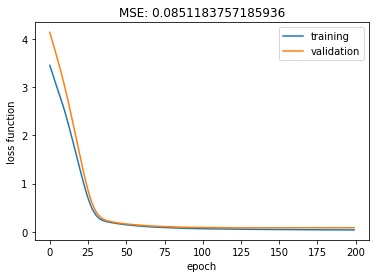

In [86]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')        

**Revisar el comportamiento de las curvas de la función de pérdida:** https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

In [87]:
Y_pred = model.predict(X_val)

### Ejercicio: repetir los tres ejemplos y hacer predicciones de dos diferentes vectores para cada una de las tres funciones.

In [92]:
# new_vector = np.array([0.7])
new_vector = np.array([0.06, 0.5, 0.1]).reshape(1,-1)
prediction = model.predict(new_vector)

print("Valor real: {}".format(float(fn(new_vector))))
print("Predicción: {}".format(float(prediction)))
prediction

Valor real: 1.1036000000000001
Predicción: 1.110312581062317


array([[1.1103126]], dtype=float32)

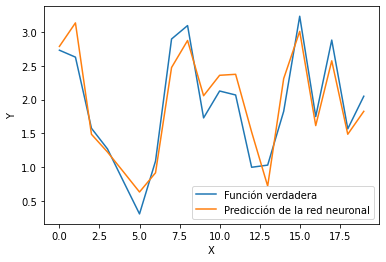

In [89]:
# # Graficar para los primeros dos casos
# plt.scatter(X_val, Y_val, label='Función verdadera')
# plt.scatter(X_val, Y_pred, label='Predicción de la red neuronal')

### Descomentar siguientes dos para el tercer ejemplo.
plt.plot(Y_val, label='Función verdadera')
plt.plot(Y_pred, label='Predicción de la red neuronal')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Clasificación con ANN

In [13]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_test, x_val = train_test_split(x_test, test_size=0.5, random_state=0)
y_test, y_val = train_test_split(y_test, test_size=0.5, random_state=0)

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique val labels
unique, counts = np.unique(y_val, return_counts=True)
print("\nValidation labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Validation labels:  {0: 496, 1: 565, 2: 506, 3: 499, 4: 502, 5: 451, 6: 456, 7: 526, 8: 490, 9: 509}

Test labels:  {0: 484, 1: 570, 2: 526, 3: 511, 4: 480, 5: 441, 6: 502, 7: 502, 8: 484, 9: 500}


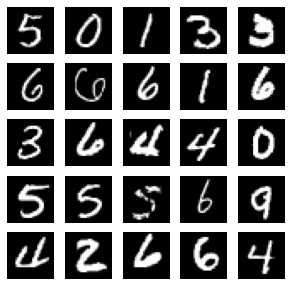

In [14]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [15]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [16]:
y_test

array([5, 2, 9, ..., 1, 1, 6], dtype=uint8)

In [17]:
np.shape(y_train), np.shape(y_test)

((60000,), (5000,))

In [18]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
np.shape(y_train), np.shape(y_test)

((60000, 10), (5000, 10))

In [21]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [22]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
x_val = np.reshape(x_val, [-1, input_size])
x_val = x_val.astype('float32') / 255

#### Dropout

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/dropout.gif)

In [38]:
# network parameters
batch_size = 128
hidden_units = 50
dropout = 0.1

La función de activación softmax se usa para clasificación de varias etiquetas.

$$P(y=j|x)=\frac{e^{w^T_jx+b_j}}{\sum_k e^{w^T_kx+b_k}}$$

![](https://developers.google.com/static/machine-learning/crash-course/images/SoftmaxLayer.svg)
Fuente: Google developers

In [39]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

##### Función de costo 'categorical cross entropy' para clasificación de varias etiquetas.

In [40]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.8470 - val_loss: 0.2076 - val_accuracy: 0.9412
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2425 - accuracy: 0.9278 - val_loss: 0.1507 - val_accuracy: 0.9536
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1929 - accuracy: 0.9418 - val_loss: 0.1241 - val_accuracy: 0.9634
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1662 - accuracy: 0.9506 - val_loss: 0.1099 - val_accuracy: 0.9666
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1453 - accuracy: 0.9554 - val_loss: 0.1008 - val_accuracy: 0.9688
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 0.0937 - val_accuracy: 0.9714
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1221 - accuracy: 0.9625 - val_loss: 0.0894 - val_accuracy: 0.9734

Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0365 - accuracy: 0.9878 - val_loss: 0.1032 - val_accuracy: 0.9764
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.1092 - val_accuracy: 0.9790
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.1006 - val_accuracy: 0.9766
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9873 - val_loss: 0.1006 - val_accuracy: 0.9762
Epoch 62/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.1046 - val_accuracy: 0.9768
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.1060 - val_accuracy: 0.9792
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.1006 - val_accuracy:

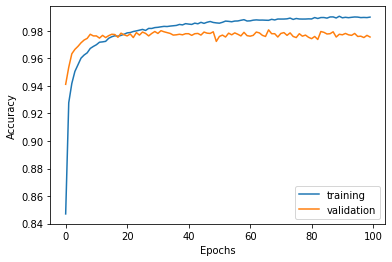

In [44]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# plt.ylim(0.1, 1)
plt.legend()

In [45]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

40/40 [==============================] - 0s 887us/step - loss: 0.1335 - accuracy: 0.9714

Test accuracy: 97.1%


### Práctica: 

1. Calcular otras métricas.
2. Dibujar o descargar un numero del 1 al 10 y predecir.
3. Describe el preprocesamiento de las imágenes para entrenar la red neuronal.

### Práctica:

Diseñar y entrenar otra red neural para otro conjunto de datos, explicar si se trata de una regresión o clasificación.